## W에 대한 그래프 그리기

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("TensorFlow Version: %s" % (tf.__version__))


TensorFlow Version: 2.0.0


In [7]:
X = np.array([1, 2, 3, 4, 5])
Y = np.array([1, 2, 3, 4, 5])

# Cost function 정의
def cost_func(W, X, Y):
    err = 0
    for i in range(len(X)):
        err += (W * X[i] - Y[i]) ** 2
    cost = err / len(X)

    # 또는 TF2.0에서는 다음과 같이 사용가능합니다
    # hypothesis = W * X
    # cost = tf.reduce_mean(tf.square(hypothesis-Y))
    return cost

cost_list = []
W_range = np.linspace(-2, 4, num=100) # -2 ~ 4 범위에서 100개의 w생성

for feed_W in W_range:
    curr_cost = cost_func(feed_W, X, Y)  # W에 대한 cost를 계산해서 curr_cost에 값을 반환한다.
    cost_list.append(curr_cost) 

    if len(cost_list) % 20 == 0:
        print("W: %s \nCost: %s \n" % (feed_W, curr_cost))

minimum_index = cost_list.index(min(cost_list))
optimal_W = W_range[minimum_index]
optimal_cost = cost_list[minimum_index]

print("Optimal W : %s" % optimal_W)
print("Optimal Cost: %s" % optimal_cost)

W: -0.8484848484848484 
Cost: 37.58585858585859 

W: 0.36363636363636376 
Cost: 4.454545454545453 

W: 1.5757575757575757 
Cost: 3.646464646464646 

W: 2.787878787878788 
Cost: 35.161616161616166 

W: 4.0 
Cost: 99.0 

Optimal W : 0.9696969696969697
Optimal Cost: 0.010101010101010083


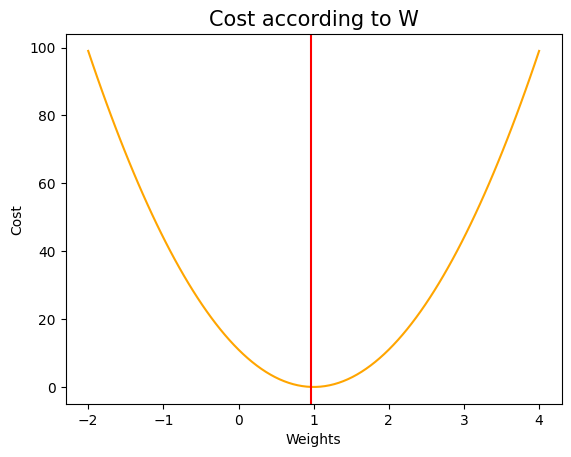

In [8]:
plt.title("Cost according to W", size=15)
plt.plot(W_range, cost_list, color='orange')
plt.axvline(x=optimal_W, color='red')
plt.xlabel("Weights")
plt.ylabel("Cost")
plt.show()

## Graident Descent 구현하기

In [13]:
tf.random.set_seed(2020)

x_data = [1, 2, 3, 4, 5]
y_data = [1, 3, 5, 7, 9]
alpha = 0.01

W = tf.Variable(tf.random.normal([1], mean = 0.0))

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)

    if step % 50 == 0:
        print("#%s \t W: %s \t Cost: %s" % (step, W.numpy(), cost.numpy()))


#0 	 W: [0.02011158] 	 Cost: 13.3341675
#50 	 W: [0.99711144] 	 Cost: 0.00011587101
#100 	 W: [0.99999154] 	 Cost: 1.0004442e-09
#150 	 W: [0.99999976] 	 Cost: 5.2295944e-13
#200 	 W: [0.99999976] 	 Cost: 5.2295944e-13
#250 	 W: [0.99999976] 	 Cost: 5.2295944e-13
